In [1]:
%run "../common.ipynb"

# Machine Learning Notes

### Introduction

What is Machine Learning?

* Supervised Learning
* Unsupervised learning 
* Classfication
* Regression
* Clustering
* Analysis 
* Parametric
* Non-parametric
----
* Feature scaling
* polynomial features

## Linear Regression

Hypothesis: $h(x) = \theta^T x = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + ... \theta_n * x_n$

$h(X) = y $

Error function $ J(\theta) = \frac{1}{2m} \sum_{i=0}^{m} (h(x_i) -y_i)^2)$

Here $ h(x_i)$ is the value hypothesis function predicts

In Linear-Regression models, one hypothesizes the population is comes from a linear model. 
<br/>The learning algorithm will find a set of parameters $\theta$ such that the error function is minimized.


### Practical tips to make linear regression faster

* Use feature scaling - normalize and standardize all features between -1 and 1 (or something -3 to +3)
<br/>This will make the gradient decent runs faster
<br/>Different type is feature scalings are (normalizing) or mean normalization (divide by mean)

* Learning rate: play around the idea of learning rate - use the larger learning rate and changing when solution is converging. 
<br/>Learing rate is used to scale the value to slightly adjust the weight

* Manufacture new features 
<br/> For ex. in house prediction, instead of house length and width, you may add $ area = l \times w $
<br/> If the scatter plot is not exactly  linear, consider adding squared or cubic value of features $f = x + x^2 + x^3 + \sqrt{x}$

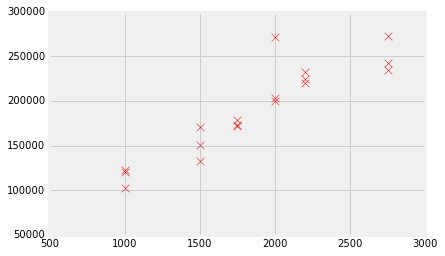

In [20]:
# Here is an example of linear regression

X = [ 1000, 1500, 1750, 2000, 2200, 2750, 1000, 1500, 1750, 2000, 2200, 2750, 1000, 1500, 1750, 2000, 2200, 2750]
y = [ 120000, 150075, 178990, 271000, 224040, 272350, 102300, 170230, 172350, 200230, 220320, 234750, 123000, 
      132300, 173250, 203700, 232200, 242750]
plt.scatter(X, y,  alpha=1, marker='x', s=60, c = 'r')
plt.show()

## Logistic regression